In [2]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env = BlackjackEnv()

In [4]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for episode_i in range(num_episodes):
        
        #1. Creating an Episode
        
        Episode = []
        
        observation = env.reset()
        #observation contains : score, dealer_score, usable_ace
        for t in range(100):
            action = sample_policy(observation)
            observation, reward, done, _ = env.step(action)
            
            Episode.append([observation, reward])
            
            if done:
                break
        
        #print(Episode)
        
        G = 0
        
        Episode_reverse = Episode
        Episode_reverse.reverse()
        
        #2. Evaluating Returns
        
            #Note that we use backward view
        
        for i, step in enumerate(Episode_reverse):
            
            G = discount_factor * G + step[1]
            
            
            
            if step[0] in [Episode_reverse[j][0] for j in range(i+1, len(Episode))]:
        
                continue
                
            else:
                
                returns_sum[step[0]] += G
                returns_count[step[0]] += 1
                V[step[0]] = returns_sum[step[0]]/returns_count[step[0]]        
                
                
                
            
    
            
        
        
       
        
        
    
    # Implement this!

    return V

![](https://i.stack.imgur.com/Q8YCg.png)

In [5]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

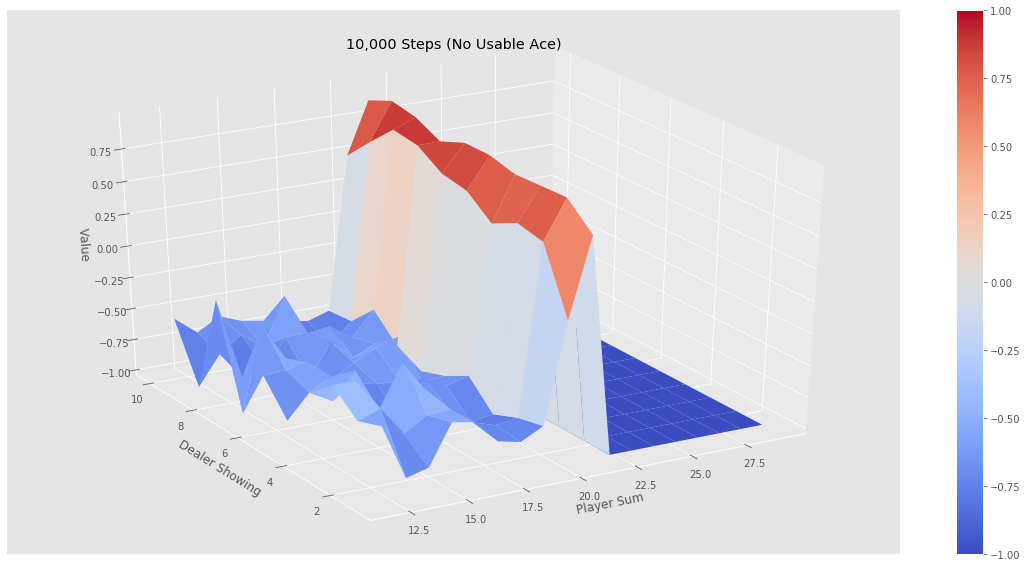

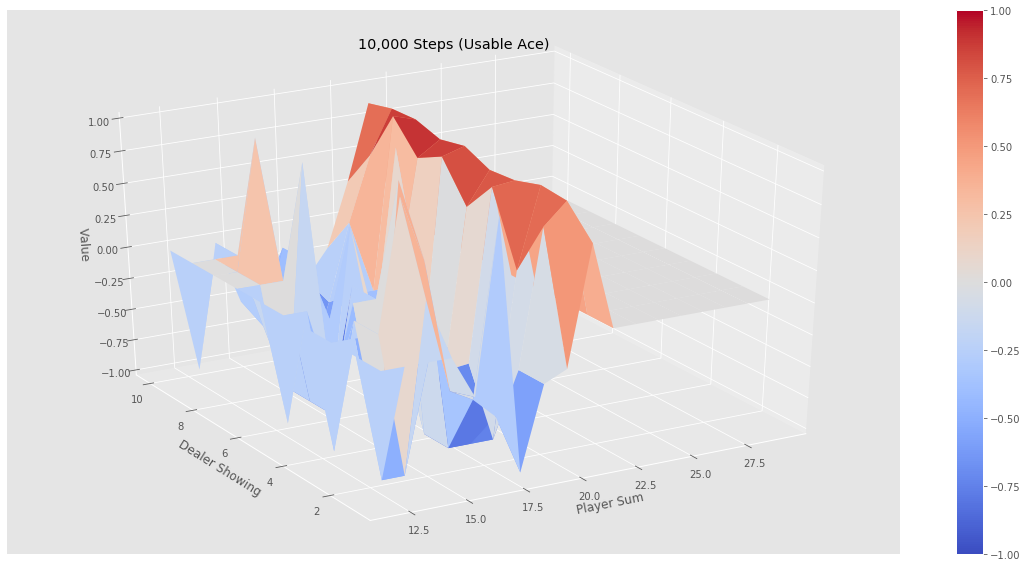

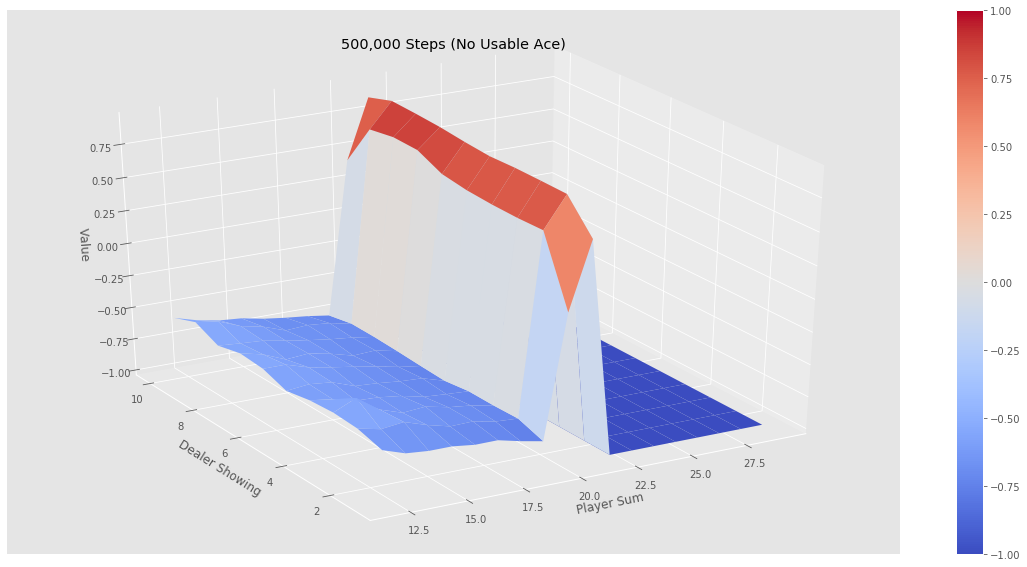

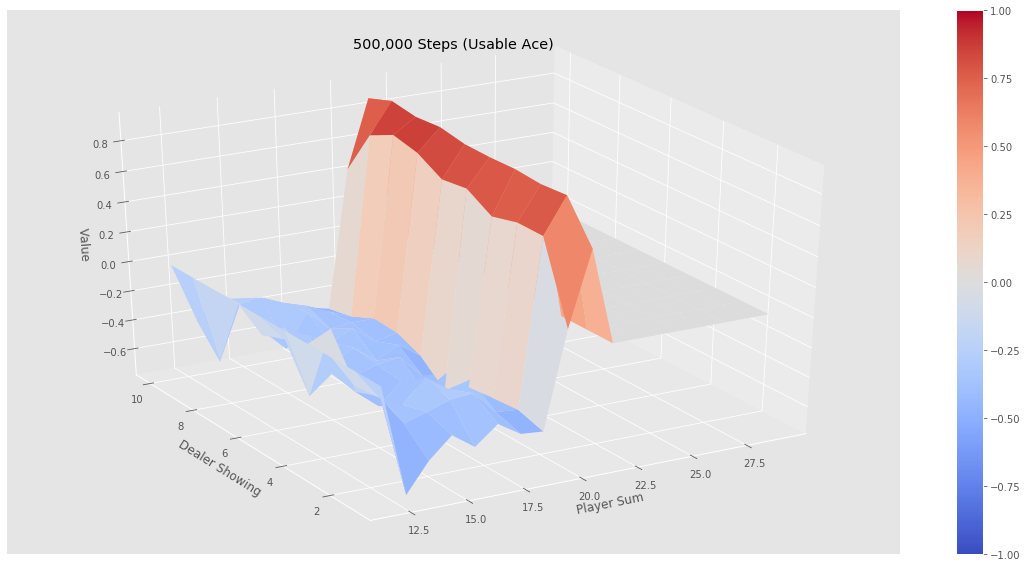

In [6]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

In [32]:
next(i for i in range(10) if i==7)

7

In [61]:
episode = [(1,2,3),(4,5,6),(7,8,9)]
x = set(x[0] for x in episode)

In [54]:
set(x[0] for x in episode)

{1, 4, 7}

In [65]:
tuple([2,2])

(2, 2)

In [6]:
a = [[1,2],['a','b'],[3,4]]

In [10]:
b = ['a','c']

In [11]:
b in a

False

In [21]:
for i in range(6,6):
    c = b in a[i:]
    print(c)

In [29]:
z = reversed(a)

In [34]:
reversed?

Init signature: reversed(self, /, *args, **kwargs)
Docstring:     
reversed(sequence) -> reverse iterator over values of the sequence

Return a reverse iterator
Type:           type
Subclasses:     


In [39]:
a.reverse()

In [37]:
a

[[3, 4], ['a', 'b'], [1, 2]]